# ISYE 6644 - Mini Project 1 
## Team 10
### Group Members: Tan Yan Chong

In [8]:
import math
import numpy as np
from numpy import random
import seaborn as sns
import collections
from scipy import optimize
import matplotlib.pyplot as plt

## Comparison of Random Generators

#### Random Generator using numpy.random.choice

<AxesSubplot:ylabel='Count'>

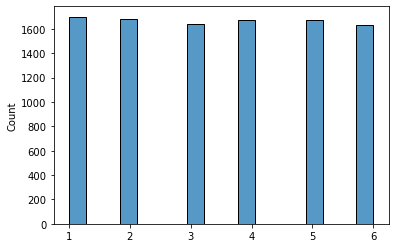

In [1]:
random.seed(13062021)

sns.histplot([random.choice([1,2,3,4,5,6]) for i in range(0,10000)])

#### Pseudo Random Number Generator

<AxesSubplot:ylabel='Count'>

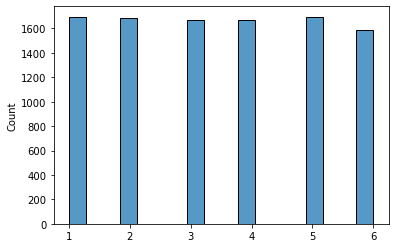

In [5]:
def random_generator(seed, n):
    X = []
    for i in range(0,n):
        if len(X)==0:
            X.append(((16807*seed)%(2**31-1))/(2**31-1))
        else:
            X.append(((16807*X[::-1][0]*(2**31-1))%(2**31-1))/(2**31-1))
    
    return X

self_generated_random = random_generator(13062021, 10001)
self_generated_random.pop(0)
sns.histplot([math.ceil(i*6) for i in self_generated_random])

## Code Implementation for Game Length

In [7]:
random.seed(13062020)

games_length = []

for i in range(0,10000): # We will simulate the scenario 10,000 times 
    # End Game Trigger
    end_game = 0  
    # Initially, there are 4 coins for both A & B each.
    records = {"A":[4], "B":[4]}    
    # Initial coins in pot is 2    
    pot_record = [2]    
    # Dice Roll Record. Initially empty.   
    dice_roll_record = []
    while end_game==0: 
        for i in records:
            dice_roll = random.choice([1,2,3,4,5,6])
            dice_roll_record.append(dice_roll)        
            if dice_roll==1:
                # Do nothing. So append previous record as latest record.
                records[i].append(records[i][-1])
                pot_record.append(pot_record[-1])
            elif dice_roll == 2:
                # Take all coins in pot
                if pot_record[-1]>0: #There must be some coins in pot first!
                    result = records[i][-1] + pot_record[-1]
                    records[i].append(result)
                    pot_record.append(0)
            elif dice_roll==3:
                # Take half of coins in pot rounded down
                if pot_record[-1]>0:
                    result = records[i][-1] + pot_record[-1]//2
                    records[i].append(result)
                    pot_record.append(pot_record[-1] - pot_record[-1]//2)
            elif dice_roll in [4,5,6]:
                # Player Put Coins in Pot
                if records[i][-1]==0:
                    end_game = 1
                    records[i].append(0)
                elif records[i][-1]>0:
                    records[i].append(records[i][-1] - 1)
                    pot_record.append(pot_record[-1] +1)
    
    games_length.append(len(records["A"])-1)

## Code Implementation for Exponential Curve Fitting

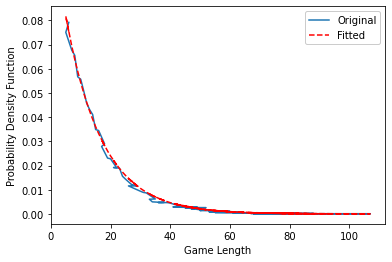

In [9]:
def exp_func(x, lambda_):
    return lambda_*np.exp(-lambda_*(x - 5))

turns_distribution = dict(collections.Counter(games_length))
turns_distribution = dict(sorted(turns_distribution.items(), key = lambda x: x[1], reverse = True))
turns = list(turns_distribution.keys())
observations = list(turns_distribution.values())
observations = [i/len(games_length) for i in observations]

popt, pcov = optimize.curve_fit(exp_func, turns, observations)
modeled_y = [popt[0]*math.exp(-popt[0]*(i-5)) for i in turns]

plt.plot(turns, observations, label = "Original")
plt.plot(turns, modeled_y, "r--", label = "Fitted")
plt.xlabel("Game Length")
plt.ylabel("Probability Density Function")
plt.legend(framealpha=1, frameon=True)

## Code Implementation for Changing Number of Coins

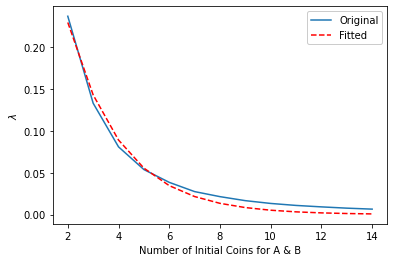

In [13]:
random.seed(13062020)

initial_coins = list(range(2,15))

lambdas = []

for v in initial_coins:     
    games_length = []     
    for i in range(0,10000):    
         
        end_game = 0
        records = {"A":[v], "B":[v]}
        pot_record = [2]   
        dice_roll_record = []

        while end_game==0: 
            for i in records:
                dice_roll = random.choice([1,2,3,4,5,6])
                dice_roll_record.append(dice_roll)
        
                if dice_roll==1:
                    records[i].append(records[i][-1])
                    pot_record.append(pot_record[-1])
                elif dice_roll == 2:
                    if pot_record[-1]>0: 
                        result = records[i][-1] + pot_record[-1]
                        records[i].append(result)
                        pot_record.append(0)
                elif dice_roll==3:
                    if pot_record[-1]>0:
                        result = records[i][-1] + pot_record[-1]//2
                        records[i].append(result)
                        pot_record.append(pot_record[-1] - pot_record[-1]//2)
                elif dice_roll in [4,5,6]:
                    # Player Put Coins in Pot
                    if records[i][-1]==0:
                        end_game = 1
                        records[i].append(0)
                    elif records[i][-1]>0:
                        records[i].append(records[i][-1] - 1)
                        pot_record.append(pot_record[-1] +1)
    
        games_length.append(len(records["A"])-1)
    
    def exp_func(x, lambda_):
        return lambda_*np.exp(-lambda_*(x - v - 1))

    turns_distribution = dict(collections.Counter(games_length))
    turns_distribution = dict(sorted(turns_distribution.items(), key = lambda x: x[1], reverse = True))
    turns = list(turns_distribution.keys())
    observations = list(turns_distribution.values())
    observations = [i/len(games_length) for i in observations]

    popt, pcov = optimize.curve_fit(exp_func, turns, observations)  

    lambdas.append(popt[0])    

def emp_func(x, a, b, c):
    return a*np.exp(-b*(x - c))

popt, pcov = optimize.curve_fit(emp_func, initial_coins, lambdas)  

modeled_y = [popt[0]*math.exp(-popt[1]*(i-popt[2])) for i in initial_coins]

plt.plot(initial_coins, lambdas, label = "Original")
plt.plot(initial_coins, modeled_y, "r--", label = "Fitted")
plt.xlabel("Number of Initial Coins for A & B")
plt.ylabel("$\lambda$")
plt.legend(framealpha=1, frameon=True)

## Code Implementation for True $\lambda$ Estimation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

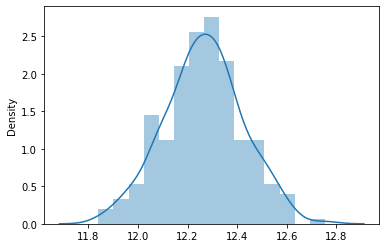

In [16]:
random.seed(13062020)

mean_turns = []

for i in range(0,250):
    
    games_length = []
    
    for i in range(0,10000): # We will simulate the scenario 10,000 times
    
        # End Game Trigger    
        end_game = 0  
            
        # Initially, there are 4 coins for both A & B each.
        # We will record the changes in coins to help in troubleshooting, if necessary.
    
        records = {"A":[4], "B":[4]}
    
        # Initial coins in pot is 2    
        pot_record = [2]
    
        # Dice Roll Record. Initially empty. 
        # Vector length of dice_roll_record should be 1 less than vector of pot_record
    
        dice_roll_record = []

        while end_game==0: 
            for i in records:
                dice_roll = random.choice([1,2,3,4,5,6])
                dice_roll_record.append(dice_roll)
        
                if dice_roll==1:
                    # Do nothing. So append previous record as latest record.
                    records[i].append(records[i][-1])
                    pot_record.append(pot_record[-1])
                elif dice_roll == 2:
                    # Take all coins in pot
                    if pot_record[-1]>0: #There must be some coins in pot first!
                        result = records[i][-1] + pot_record[-1]
                        records[i].append(result)
                        pot_record.append(0)
                elif dice_roll==3:
                    # Take half of coins in pot rounded down
                    if pot_record[-1]>0:
                        result = records[i][-1] + pot_record[-1]//2
                        records[i].append(result)
                        pot_record.append(pot_record[-1] - pot_record[-1]//2)
                elif dice_roll in [4,5,6]:
                    # Player Put Coins in Pot
                    if records[i][-1]==0:
                        end_game = 1
                        records[i].append(0)
                    elif records[i][-1]>0:
                        records[i].append(records[i][-1] - 1)
                        pot_record.append(pot_record[-1] +1)
    
        games_length.append(len(records["A"])-1)
        
    turns_distribution = dict(collections.Counter(games_length))
    turns_distribution = dict(sorted(turns_distribution.items(), key = lambda x: x[1], reverse = True))
    turns = list(turns_distribution.keys())
    observations = list(turns_distribution.values())
    observations = [i/len(games_length) for i in observations]
        
    def exp_func(x, lambda_):
        return lambda_*np.exp(-lambda_*(x - 5))
        
    popt, pcov = optimize.curve_fit(exp_func, turns, observations)               
        
    mean_turns.append(1/popt[0])

sns.distplot(mean_turns)